In [1]:
# LIBRARY:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

import statsmodels as sa

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline
%matplotlib nbagg

%cd /Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/bb_test_results/qvalues/GTEX-ALL_SAMPLES/

/Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/bb_test_results/qvalues/GTEX-ALL_SAMPLES


In [3]:
# Import dataset:

df = pd.read_csv('GTEX-ALL_SAMPLES.v8.phASER.gw_phased.results.fdr_ALL.gene_info.zscores.txt.gz', sep='\t', compression='gzip')

# add column for GENE_IDs without version #:
df[['GENE_ID','ens_version']] = df['GENE_ID'].str.split('.',expand=True)

df.head()

/Users/snkravitz/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CHR,GENE_ID,GENE_NAME,gene_start,gene_stop,SUBJECT_ID,tissue_num,data_pvalues,data_qvalues,data_lfdr,mean_read_counts,total_sample_count_females,total_sample_count_males,total_sample_count,count_fdr_0p1,daee_pctile_fdr_0p1,z_score,RME_effect,ens_version
0,1,ENSG00000228794,LINC01128,825137,859446,GTEX-SE5C,14.0,0.233974,0.655684,1.0,58.0,133.0,NaN,414,74.0,0.178744,0.315991,private_RME,8
1,1,ENSG00000223764,RP11-54O7.3,916869,919692,GTEX-SE5C,10.0,1.000000,1.000000,1.0,38.0,173.0,NaN,492,132.0,0.268293,0.915775,private_RME,2
2,1,ENSG00000188976,NOC2L,944581,959309,GTEX-SE5C,17.0,1.000000,1.000000,1.0,178.0,179.0,NaN,532,48.0,0.090226,-0.276891,private_RME,10
3,1,ENSG00000187961,KLHL17,960586,965715,GTEX-SE5C,15.0,0.473719,1.000000,1.0,24.0,160.0,NaN,473,34.0,0.071882,-0.399756,private_RME,13
4,1,ENSG00000187583,PLEKHN1,966496,975108,GTEX-SE5C,7.0,0.525752,1.000000,1.0,96.0,194.0,NaN,566,47.0,0.083039,-0.325026,private_RME,10


In [5]:
# Import Gene Expression info dataset:

df_tpms = pd.read_csv('/Users/snkravitz/Documents/GTEx_Summary_Data/GTEx_v8_StudyFiles/GTEx.v8.all-tissues.gene_expression.info.txt', sep='\t')

# add column for GENE_IDs without version #:
df_tpms[['GENE_ID','ens_version']] = df_tpms['GENE_ID'].str.split('.',expand=True)

df_tpms.head()

,GENE_ID,GENE_NAME,tissue_num,median_tpm,variance_tpm,ens_version
0,ENSG00000223972,DDX11L1,1,0.166403,NaN,5
1,ENSG00000227232,WASH7P,54,3.617360,3.405472,5
2,ENSG00000278267,MIR6859-1,0,NaN,NaN,1
3,ENSG00000243485,MIR1302-2HG,10,0.024489,0.000113,5
4,ENSG00000237613,FAM138A,0,NaN,NaN,2


In [6]:
## Filter out X-Chr genes, Imprinted genes, and HLA genes:

# Remove X-Chr:
df = df[df['CHR'] != 'X']

# Remove HLA genes:
df = df[~df['GENE_NAME'].str.contains("HLA")]

# Remove Imprinted Genes:
imprinted_df = pd.read_csv("~/Documents/Gene_Lists/GTEx_Imprinting/GTEx_Imprinted_Table_S3andS4.uniq.txt", sep=' ', names=['GENE_ID', 'chrom', 'start'])
imprinted_genes = list(imprinted_df['GENE_ID'])
#imprinted_genes
df = df[~df['GENE_ID'].isin(imprinted_genes)]


In [7]:
# Merge median Z-score to med_tpms

df_tpms = df_tpms.merge(df[['GENE_ID', 'z_score']].drop_duplicates(), how='inner', on='GENE_ID')
df_tpms.head()


,GENE_ID,GENE_NAME,tissue_num,median_tpm,variance_tpm,ens_version,z_score
0,ENSG00000227232,WASH7P,54,3.617360,3.405472,5,NaN
1,ENSG00000268903,RP11-34P13.15,54,3.411975,367.654801,1,4.995202
2,ENSG00000228463,AP006222.2,54,0.356770,0.075777,9,-0.881208
3,ENSG00000230021,RP5-857K21.4,54,0.043179,0.001558,8,1.569513
4,ENSG00000237973,MTCO1P12,54,47.706100,1450.663006,1,NaN


In [16]:
# Drop rows with no Z-Score: 

df_tpms = df_tpms[~np.isnan(df_tpms['z_score'])]
df_tpms.head()


,GENE_ID,GENE_NAME,tissue_num,median_tpm,variance_tpm,ens_version,z_score
1,ENSG00000268903,RP11-34P13.15,54,3.411975,367.654801,1,4.995202
2,ENSG00000228463,AP006222.2,54,0.356770,0.075777,9,-0.881208
3,ENSG00000230021,RP5-857K21.4,54,0.043179,0.001558,8,1.569513
5,ENSG00000229344,MTCO2P12,54,13.150400,60.250941,1,-0.365989
7,ENSG00000198744,MTCO3P12,54,18.592100,117.301452,5,-0.881208


In [21]:
df_tpms.dropna().shape

(23481, 7)

<IPython.core.display.Javascript object>


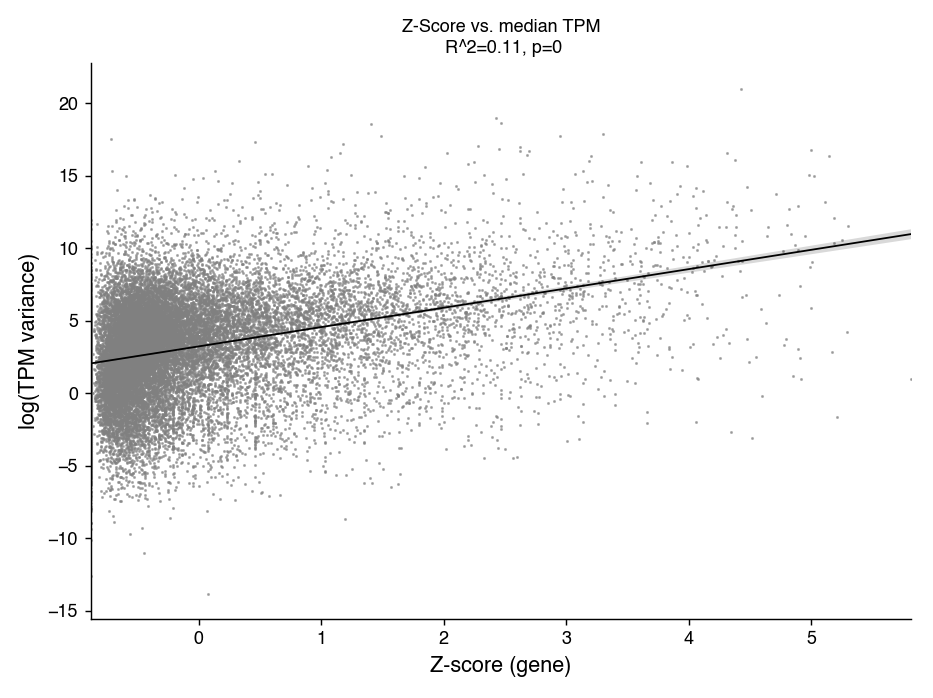

0.11406353259206836


In [38]:
## Plotting z-score vs. TPM variance:

f, ax = plt.subplots(figsize=(4,3), tight_layout=True)
sns.despine()


df_tpms = df_tpms.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_tpms['z_score'], np.log(df_tpms['variance_tpm']))
r_squared = r_value ** 2

ax = sns.regplot(data=df_tpms, x=df_tpms['z_score'], y=np.log(df_tpms['variance_tpm']), fit_reg=True, truncate=True, ci=95, scatter_kws={"color":"grey", "s": 0.5, "alpha": 0.6, 'rasterized': True}, line_kws={"color":"black", "lw":1})
ax.set_xlabel('Z-score (gene)', fontsize=12, fontweight='light')
ax.set_ylabel('log(TPM variance)', fontsize=12, fontweight='light')
ax.set_title('Z-Score vs. median TPM\n R^2={0:.2g}, p={1:.2g}'.format(r_squared, p_value), fontsize=10)

print(r_squared)
#f.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.tpm-variance.vs.z-score_regplot.pdf', dpi=400, transparent=True)



In [30]:
## Subset RME and Biallelic genes (and 'Unknown'):

df_tpms['mosaic_category'] = np.where(df_tpms['z_score'] >= 0.74, 'RAE', 'Unknown')
df_tpms['mosaic_category'] = np.where(df_tpms['z_score'] < 0, 'Biallelic', df_tpms['mosaic_category'])

df_tpms.head()

,GENE_ID,GENE_NAME,tissue_num,median_tpm,variance_tpm,ens_version,z_score,mosaic_category
1,ENSG00000268903,RP11-34P13.15,54,3.411975,367.654801,1,4.995202,RAE
2,ENSG00000228463,AP006222.2,54,0.356770,0.075777,9,-0.881208,Biallelic
3,ENSG00000230021,RP5-857K21.4,54,0.043179,0.001558,8,1.569513,RAE
5,ENSG00000229344,MTCO2P12,54,13.150400,60.250941,1,-0.365989,Biallelic
7,ENSG00000198744,MTCO3P12,54,18.592100,117.301452,5,-0.881208,Biallelic


<IPython.core.display.Javascript object>


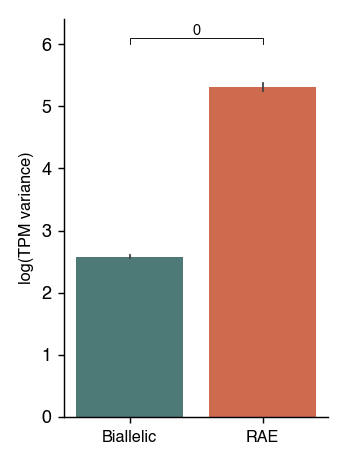

F_onewayResult(statistic=1813.6356701775776, pvalue=0.0)


In [37]:
## Plot boxplot of Biallelic vs. RAE genes for median TPMs variance:

f, ax = plt.subplots(figsize=(1.5, 2), tight_layout=True)
sns.despine()

#kw_pval = stats.kruskal(chromHMM_count[chromHMM_count['mosaic_category'] == 'RME']['state_label_mnemonic'], chromHMM_count[chromHMM_count['mosaic_category'] == 'Biallelic']['state_label_mnemonic'], nan_policy='omit')
f_oneway = stats.f_oneway(np.log(df_tpms[df_tpms['mosaic_category'] == 'Biallelic']['variance_tpm']), np.log(df_tpms[df_tpms['mosaic_category'] == 'RAE']['variance_tpm']))
print(f_oneway)


ax = sns.barplot(x='mosaic_category', y=np.log(df_tpms['variance_tpm']), data=df_tpms[df_tpms['mosaic_category'] != 'Unknown'], order=["Biallelic", "RAE"], palette=["#46807D","#E35E39"], ci=68, errwidth=1)
ax.plot([0, 0, 1, 1], [6, 6.1, 6.1, 6], lw=0.5, c='k')
ax.text(0.5, 6.1, "%.2g" % f_oneway.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("log(TPM variance)", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RAE'], fontsize=9)


#plt.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.tpm-variance.vs.z-score_barplot.ci68.pdf', transparent=True)
